In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import queue

### Task 7

**Item 1**

Function to minimize: $ f(x) = x_1^3 \sin(\frac{1}{x_1}) + 10 x_1 x_2^4 \cos(\frac{1}{x_2}) $

In [3]:
def fun(x_1, x_2):
    return x_1**3 * np.sin(1/x_1) + 10 * x_1 * x_2**4 * np.cos(1/x_2)

Random search method

minimum: -1.2883833682546109 x1_min: -0.3601719968369998 x2_min: 0.1465287200002363


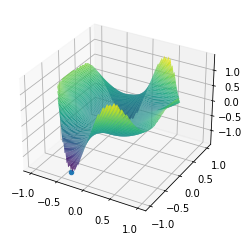

In [4]:
N = 1000

min = 0
x1_min = 0
x2_min = 0
for i in range(N):
    phi = np.random.rand() * 2 * np.pi
    x_1 = np.cos(phi)
    x_2 = np.sin(phi)
    cur_val = fun(x_1, x_2)
    if cur_val < min:
        min = cur_val
        x1_min = x_1
        x2_min = x_2

print("minimum:", min,
      "x1_min:", x1_min,
      "x2_min:", x_2)

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = fun(X, Y)
Z[X**2 + Y**2 > 1] = None

ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis')

ax.scatter(x1_min, x2_min, min)

plt.show()

**Item 2**

Rosebrock function

In [5]:
def Rosenbrock(x_1, x_2):
    return (x_1 - 1)**2 + 100 * (x_2 - x_1**2)**2

Simulated annealing algorithm for minimizing Rosenbrock function

Minimum point: [1.14533279] [1.31234433] Minimum value: [0.02115266]


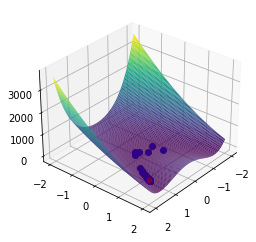

In [13]:
T_0 = 20
sigma = 1.5
k = 0.99
eps = 1e-7

ax = plt.axes(projection = '3d')

x_prev = 0
y_prev = 0
T = T_0
while T > eps:
    x_next = sps.norm.rvs(loc = x_prev, scale = sigma * T, size = 1)
    y_next = sps.norm.rvs(loc = y_prev, scale = sigma * T, size = 1)
    delta_F = Rosenbrock(x_next, y_next) - Rosenbrock(x_prev, y_prev)
    if delta_F <= 0:
        x_prev = x_next
        y_prev = y_next
        ax.plot(x_prev, y_prev, 'o', color = 'b')
    else:
        if np.random.rand() < np.exp(-delta_F / T):
            x_prev = x_next
            y_prev = y_next
            ax.plot(x_prev, y_prev, 'o', color = 'b')
    T = k * T


print("Minimum point:", x_prev, y_prev, "Minimum value:", Rosenbrock(x_prev, y_prev))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis')

ax.scatter(x_prev, y_prev, Rosenbrock(x_prev, y_prev), color = 'r')

ax.view_init(30, 40)

### Task 8

Random walk function. Accepts `grid` as a matrix with zeros ones and twos to walk in and `i`,`j` as a starting point coordinats 

In [3]:
def random_walk(grid, i, j):
    rng = np.random.default_rng()
    while grid[i][j] != 2:
        direction = rng.choice([1, 2, 3, 4])
        if direction == 1:
            i -= 1
        elif direction == 2:
            j += 1
        elif direction == 3:
            i += 1
        elif direction == 4:
            j -= 1
    return i, j

Monte-Carlo method for boundary value problem solution. 
$ \begin{array}{lcr}
\Delta u=0,(x,y)\in D,\\
u|_{\delta D}=f(x,y),\\
u\in C^2(D),f\in C(\delta D),\\
D=\lbrace x,y:x^2+y^2\leqslant1\rbrace,
\end{array} $
where $ f(x, y) = x^2 - y^2 $

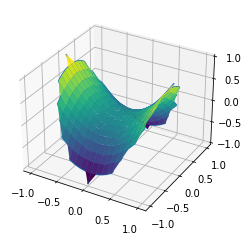

In [4]:
f = lambda x, y : x**2 - y**2

h = 0.1

grid_size = int(2 / h + 1)
grid = np.zeros((grid_size, grid_size))

N = 1000

for i in range(grid_size):
    for j in range(grid_size):
        if (-1 + i * h)**2 + (-1 + j * h)**2 <= 1: 
            grid[i][j] = 1

for i in range(grid_size):
    for j in range(grid_size):
        if grid[i][j] == 1:
            if i == 0 or i == grid_size - 1 or j == 0 or j == grid_size - 1:
                grid[i][j] = 2
            elif grid[i-1][j] == 0 or grid[i+1][j] == 0 or grid[i][j-1] == 0 or grid[i][j+1] == 0:
                grid[i][j] = 2


Z = np.zeros((grid_size, grid_size))
sum = 0
i_end, j_end = 0, 0
for i in range(grid_size):
    for j in range(grid_size):
        if grid[i][j] != 0:
            sum = 0
            for n in range(N):
                i_end, j_end = random_walk(grid, i, j)
                sum += f(-1 + j_end * h, -1 + i_end * h)
            Z[i][j] = sum/N
        else:
            Z[i][j] = None


x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis')

ax = plt.axes(projection = '3d')
Z = f(X, Y)
Z[X**2 + Y**2 > 1] = None
ax.plot_wireframe(X, Y, Z)

plt.show()

Analytical solution plotting

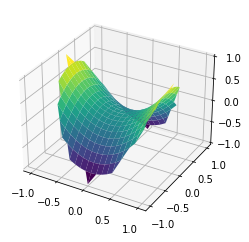

In [7]:
f = lambda x, y : x**2 - y**2

h = 0.1

grid_size = int(2 / h + 1)

x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

ax = plt.axes(projection = '3d')
Z = f(X, Y)
Z[X**2 + Y**2 > 1] = None
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis')

### Task 9

Function to generate Wiener process in $ [0, 1] $ interval. Accepts `N` to generate with step $ dt = \dfrac{1}{2^N} $

In [33]:
def Wiener(N):
    t = np.linspace(0, 1, 2**(N - 1) + 1)
    W = np.array([0, sps.norm.rvs(0,1)])
    for k in range(1,N):
        m = (W[:-1] + W[1:])/2
        s = np.sqrt(1/(2**(k + 1)))
        new_W = np.zeros(2**k + 1)
        new_W[::2] = W
        new_W[1::2] = sps.norm.rvs(m, s, m.shape)
        W = new_W
    return t, W

Generation and plotting

Text(0.5, 0, '$t$')

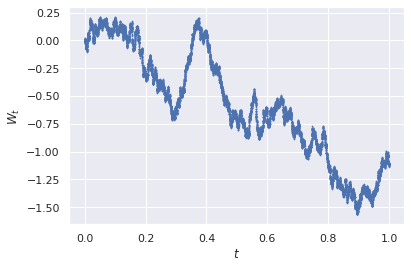

In [34]:
sns.set_theme()

t, W = Wiener(15)
plt.scatter(t, W, s = 0.5)
plt.ylabel(r'$W_t$')
plt.xlabel(r'$t$')

Function to generate Ornstein-Uhlenbeck process in $ [0, 1] $

In [7]:
def Orn_Uhl(a, s, th, N):
    t = np.linspace(0, 1, 2**(N - 1) + 1)
    ou = np.array([sps.norm.rvs(a, s**2), sps.norm.rvs(0, s**2 * (1 - np.e**(-2 * th)))])
    for k in range(1, N):
        dt = 1 / 2**(k - 1)
        sum = (ou[:-1] + ou[1:])
        e  = np.ones(2**(k - 1)) * np.e**(-th * dt)
        e2  = np.ones(2**(k - 1)) * np.e**(-th * dt / 2)
        mean = sum * e2 / (1 + e)
        sigma2 = s**2 * (1 - e) / (1 + e)
        new_ou = np.zeros(2**k + 1)
        new_ou[::2] = ou
        new_ou[1::2] = sps.norm.rvs(mean, sigma2, e.shape)
        ou = new_ou
    return t, ou

Generation and plotting

Text(0.5, 0, '$t$')

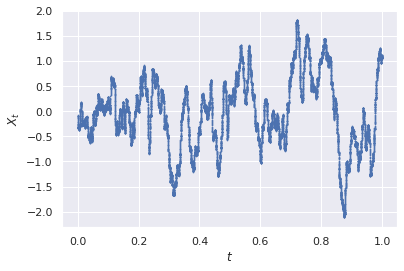

In [8]:
sns.set_theme()

t,ou = Orn_Uhl(0, 1, 50, 15)
plt.scatter(t, ou, s = 0.5)
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')

### Task 10

Process filtering function

In [9]:
def filter(y, r, sigma2, theta, dt):
    a = np.exp(-theta * dt)
    q = sigma2 * (1 - a*a)
    
    R = np.zeros(y.shape[0])
    x = np.zeros(y.shape[0])
    R0 = sigma2
    x0 = 0

    for i in range(0, y.shape[0]):
        R10 = a * a * R0 + q
        Z = R10 / (R10 + r)
        R[i] = (1 - Z) * R10

        x10 = a * x0
        x[i] = x10 + Z * (y[i] - x10)

        R0 = R[i]
        x0 = x[i]

    return x, R

Creating Ornstein-Ulenbek process and adding random normally distributed noise then filtering
successfully

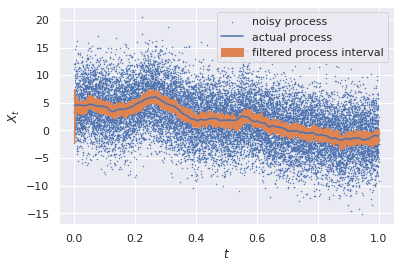

In [39]:
sns.set_theme()

a, theta, sigma2, T = 0, 3, 4, 4
n = 15
t, X = Orn_Uhl(a, np.sqrt(sigma2),theta, n)

r, gamma = 16, 0.99
noise = sps.norm.rvs(0, scale = np.sqrt(r), size = t.shape[0])
noised_sig = X + noise
z = sps.norm.ppf(1 - (1 - gamma)/2)

cleared_X, R = filter(noised_sig, r, sigma2, theta, t[1] - t[0])

plt.scatter(t, noised_sig, s = 1, marker = '.', linewidths = 1)
plt.plot(t, X)
plt.fill_between(t, cleared_X + z * np.sqrt(R), cleared_X - z * np.sqrt(R), color = sns.color_palette()[1])
plt.ylabel("$X_t$")
plt.xlabel("$t$")
plt.legend(["noisy process", "actual process", "filtered process interval"])

Creating Ornstein-Ulenbek process and adding random Cauchy-distributed noise then filtering
unsuccessfully

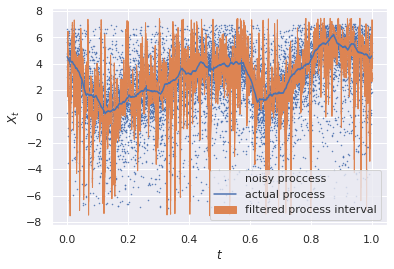

In [43]:
a, theta, sigma2, T = 0, 3, 4, 4
n = 15
t, X = Orn_Uhl(a, np.sqrt(sigma2),theta, n)

r, gamma = 1, 0.99
noise = sps.cauchy.rvs(size = t.shape[0])
noised_sig = X + noise
z = sps.norm.ppf(1 - (1 - gamma)/2)
board = 7

cleared_X, R = filter(noised_sig, r, sigma2, theta, t[1] - t[0])

plt.scatter(t[np.abs(noised_sig) < board], noised_sig[np.abs(noised_sig) < board], s = 1, marker = '.', linewidths = 1)
plt.plot(t, X)

ind = np.abs(cleared_X) < board
t = t[ind]
cleared_X = cleared_X[ind]
R = R[ind]
plt.fill_between(t, cleared_X + z * np.sqrt(R), cleared_X - z * np.sqrt(R), color = sns.color_palette()[1])
plt.ylabel("$X_t$")
plt.xlabel("$t$")
plt.legend(["noisy proccess", "actual process", "filtered process interval"])

### Task 11

**Item 1**

Queuing system

In [46]:
def add_state(t, a, q_state, q_t):
    q_state.append(q_state[-1] + a)
    q_t.append(t)

In [55]:
def simulate_queue(t, s, T):
    q_state = [0]
    q_t = [0]
    
    n = t.shape[0]
    q = queue.Queue()
    for i in range(0, n):
        if (q.empty()):
            q.put(s[i])
            curr_time = t[i]
            j = i + 1
            add_state(curr_time, 1, q_state, q_t)
        dt = q.get()
        while (j < n) and (t[j] < curr_time + dt):
            q.put(s[j])
            add_state(t[j], 1, q_state, q_t)
            j += 1
        curr_time += dt
        add_state(curr_time, -1, q_state, q_t)
    q_t = np.array(q_t)
    q_state = np.array(q_state)
    return q_t[q_t <= T], q_state[q_t <= T]

In [80]:
def get_hom_queue(lmb, T):
    N = int(1e5)
    t = sps.expon.rvs(scale = 1 / lmb, size = N).cumsum()
    while(t[-1] < T):
        t = np.append(t, sps.expon(scale = 1 / lmb, size = N).cumsum())
    t = t[t < T]
    n = t.shape[0]
    s = (sps.norm.rvs(size = [n, 10])**2).sum(axis = 1)
    return t, s

Simulation with intensivity $ \lambda = 0.09 $ (system copes with the load)

Text(0, 0.5, 'n(t)')

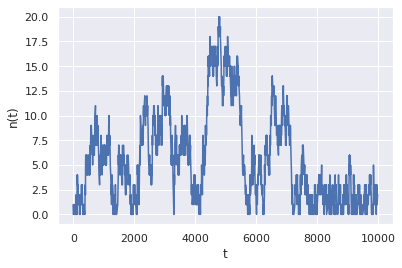

In [81]:
sns.set_theme()

T = int(10000)
l = 0.09

t, s = get_hom_queue(l, T)
t, n = simulate_queue(t, s, T)

plt.plot(t, n)
plt.xlabel("t")
plt.ylabel("n(t)")

Simulation with intensivity $ \lambda = 0.11 $ (queue grows unlimitly)

Text(0, 0.5, 'n(t)')

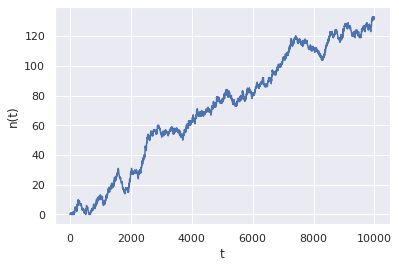

In [62]:
sns.set_theme()

T = int(10000)
l = 0.11

t, s = get_hom_queue(l, T)
t, n = simulate_queue(t, s, T)

plt.plot(t, n)
plt.xlabel("t")
plt.ylabel("n(t)")

**Item 2**

Queuing system with cyclic intensivity $\lambda = \lambda_0 (1 + \cos(t)) $

In [68]:
intensivity = lambda t: (1 + np.cos(t))
def get_cycled_queue(lmb0, T):
    t, s = get_hom_queue(lmb0, T)
    prob = intensivity(t) / 2
    ind = np.argwhere(np.random.binomial(1, prob, prob.shape[0]) == 1).reshape(-1)

    return simulate_queue(t[ind], s[ind], T)

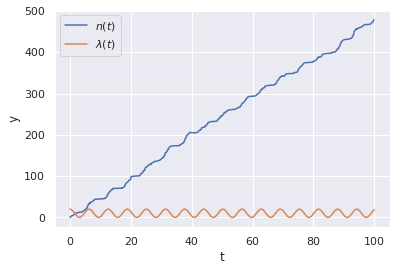

In [77]:
T = int(100)
lmb = 10
t, n = get_cycled_queue(lmb, T)
plt.plot(t, n)
x = np.linspace(0, T, int(1e5))

plt.plot(x, lmb * intensivity(x))
plt.xlabel("t")
plt.ylabel("y")
plt.legend([r'$n(t)$', r'$\lambda(t)$'])

**Item 3**

Insurance company

In [83]:
def Pareto(xm, k, n):
    return xm / (np.random.uniform(0, 1, n) ** (1/k))

In [85]:
def get_cases(lmb, T, xm, k):
    N = int(1e5)
    t = sps.expon.rvs(scale = 1 / lmb, size = N).cumsum()
    while(t[-1] < T):
        t = np.append(t, sps.expon.rvs(scale = 1 / lmb, size = N).cumsum())
    t = t[t < T]
    n = t.shape[0]

    s = Pareto(xm, k, n)
    return t, s

In [87]:

def getS(lmb, T, xm, k):
    t_case, s = get_cases(lmb, T, xm, k)
    def S1(t):
        T_CASE, T = np.meshgrid(t_case, t)
        pay = np.repeat(s.reshape(1, s.shape[0]), t.shape[0], axis = 0)
        T_CASE[T_CASE > T] = 0
        T_CASE[T_CASE != 0] = 1
        return np.sum(pay * T_CASE, axis = 1)
    def S(t):
        MAX_SIZE = int(1e7)
        res = np.zeros(t.shape)
        chunk_size = MAX_SIZE // t_case.shape[0]
        l, r = 0, 0
        while (l < t.shape[0]):
            r = min(r + chunk_size, t.shape[0])
            res[l:r] = S1(t[l:r])
            l += chunk_size
        return res
    return S

In [86]:
def getW(W0, c, S):
    def W(t):
        res = W0 + c * t - S(t)
        bankrupt = np.argwhere(res <= 0)
        if (bankrupt.any()):
            bankrupt = int(bankrupt[0])
            res[bankrupt:] = 0
        return res
    return W

$ c - \dfrac{k}{k - 1} x_m = 0 $ (company is balances)

Text(0, 0.5, 'W_t')

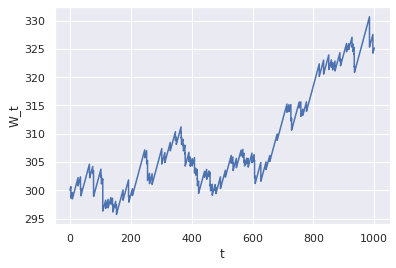

In [109]:
l, xm, k, c = 0.1, 1, 2, 0.2
W0 = 300
T = 1000
S = getS(l, T, xm, k)
W = getW(W0, c, S)

t = np.linspace(0, T, int(1e5))

plt.plot(t, W(t))
plt.xlabel("t")
plt.ylabel("W_t")

$ c - \dfrac{k}{k - 1} x_m > 0 $ (capital grows)

Text(0, 0.5, 'W_t')

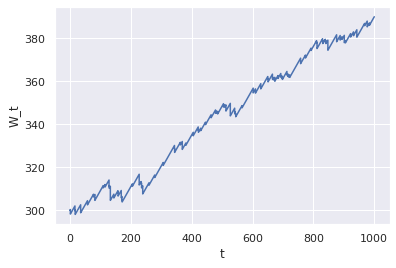

In [106]:
l, xm, k, c = 0.1, 1, 2, 0.25
W0 = 300
T = 1000
S = getS(l, T, xm, k)
W = getW(W0, c, S)

t = np.linspace(0, T, int(1e5))

plt.plot(t, W(t))
plt.xlabel("t")
plt.ylabel("W_t")

$ c - \dfrac{k}{k - 1} x_m < 0 $ (capital decreases)

Text(0, 0.5, 'W_t')

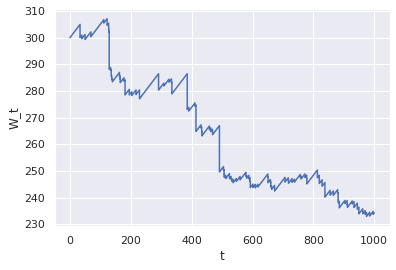

In [105]:
l, xm, k, c = 0.1, 1, 2, 0.15
W0 = 300
T = 1000
S = getS(l, T, xm, k)
W = getW(W0, c, S)

t = np.linspace(0, T, int(1e5))

plt.plot(t, W(t))
plt.xlabel("t")
plt.ylabel("W_t")